In [1]:
#Cargar paquetes
import cv2
import pytesseract
import imageio.v2 as imageio
import matplotlib.pyplot as plt
#ara uso en windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

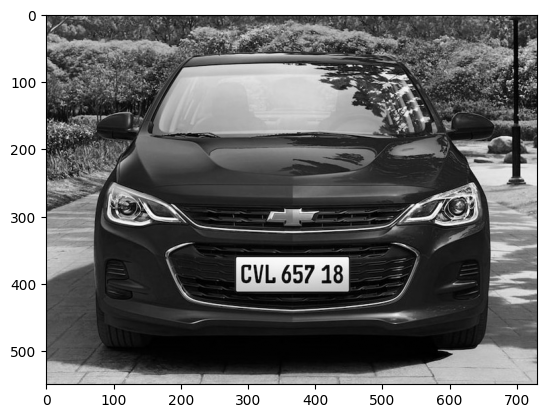

In [2]:
placa = []
image = imageio.imread(r'C:\Users\medin\OneDrive\Documentos\Ingeniería en Sistemas\Primer Semestre 2,025\inteligencia artificial\auto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

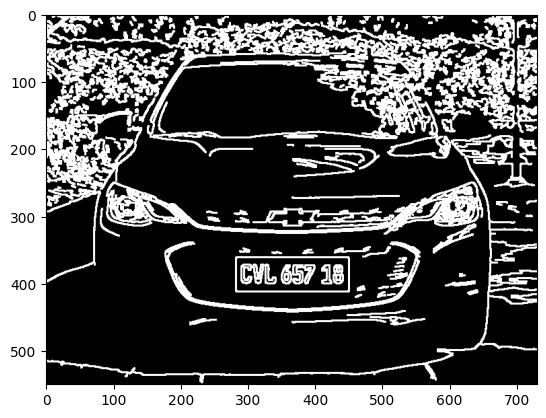

In [3]:
gray = cv2.blur(gray, (3, 3))
canny = cv2.Canny(gray, 130, 200)
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny, cmap='gray');

In [4]:
# Deteccion de contornos con OpenCV
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
for c in contorno:
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, epsilon, True)
    if len(aprox) == 4 and area > 9000:
        print('area', area)
        print('x', x)
        print('y', y)
        print('w', w)
        print('h', h)
        relAspec = float(w)/h
        print('Relacion de aspecto:', relAspec)
        cv2.drawContours(image, [aprox], 0, (0, 255, 0), 3)
        if relAspec > 3:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa, config = '--psm 11'.strip())
            print('Placa:', text)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 3)
            cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0, 255, 0), 3)

area 9007.0
x 281
y 360
w 171
h 54
Relacion de aspecto: 3.1666666666666665
Placa: CVL 657 18



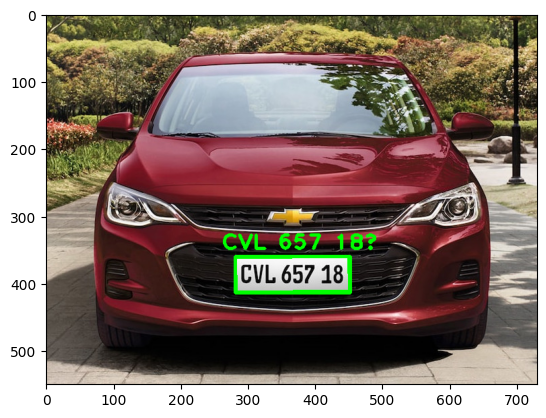

In [16]:
plt.imshow(image);